I will start by coding in notebook and then later copy the code over to a `.py` file once we start to stabilize.

This is actually a plain python file with the notebook server is interpreting as a notebook. (Or maybe that is Jupytext? I'm not 100% sure...but it is handy.)

As a C++ person, I find it very strange to define a class without defining up-front all of it's internal variables... I wonder what the proper way to do this is? 

https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

# Generate a .dat + .meta.txt file for testing

Meta file format defined on the "official" documentation page:

https://nsweb.tn.tudelft.nl/~gsteele/spyview/#meta


In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,10)
y = np.linspace(0,2,20)
z = np.linspace(0,3,30)
X,Y,Z = np.meshgrid(x,y,z,indexing='ij')
d = X+Y+Z
d.shape

(10, 20, 30)

In [3]:
# Man, this is slow...
with open('test.dat', 'w') as f:
    for k in range(len(z)):
        for j in range(len(y)):
            for i in range(len(x)):
                f.write("%e, %e\n" % (d[i,j,k], d[i,j,k]**2))

In [4]:
with open("test.meta.txt", "w") as f:
    for ax,name in zip((x,y,z),("X", "Y", "Z")):
        f.write("%d\n" % len(ax))
        f.write("%e\n" % ax[0])
        f.write("%e\n" % ax[-1])
        f.write("%s\n" % name)
    # The convention in the meta.txt file is to count from 1
    f.write("1\nData\n")
    f.write("2\nData squared\n")
    
        
print("=======")
with open("test.meta.txt") as f:
    print(f.read(),end='')
print("=======")

10
0.000000e+00
1.000000e+00
X
20
0.000000e+00
2.000000e+00
Y
30
0.000000e+00
3.000000e+00
Z
1
Data
2
Data squared


# Library code

To use the library outside of this repository folder, you will need to add the location of the datacube git repository to your python path:

https://stackoverflow.com/questions/16114391/adding-directory-to-sys-path-pythonpath/16114586

For example:

```
import sys
sys.path.insert(0,'/home/jovyan/git/datacube')
```

In [13]:
from datacube import Datacube

For interactive plots to work, we will need this:

In [14]:
%matplotlib notebook

# Testing with test file

In [15]:
dc = Datacube()

In [16]:
dc.load_dat_meta("test.dat")

## Test colorplots

In [17]:
dc.create_mtx_cut(cut_axis = 0, col=1)

(30, 20)


<IPython.core.display.Javascript object>


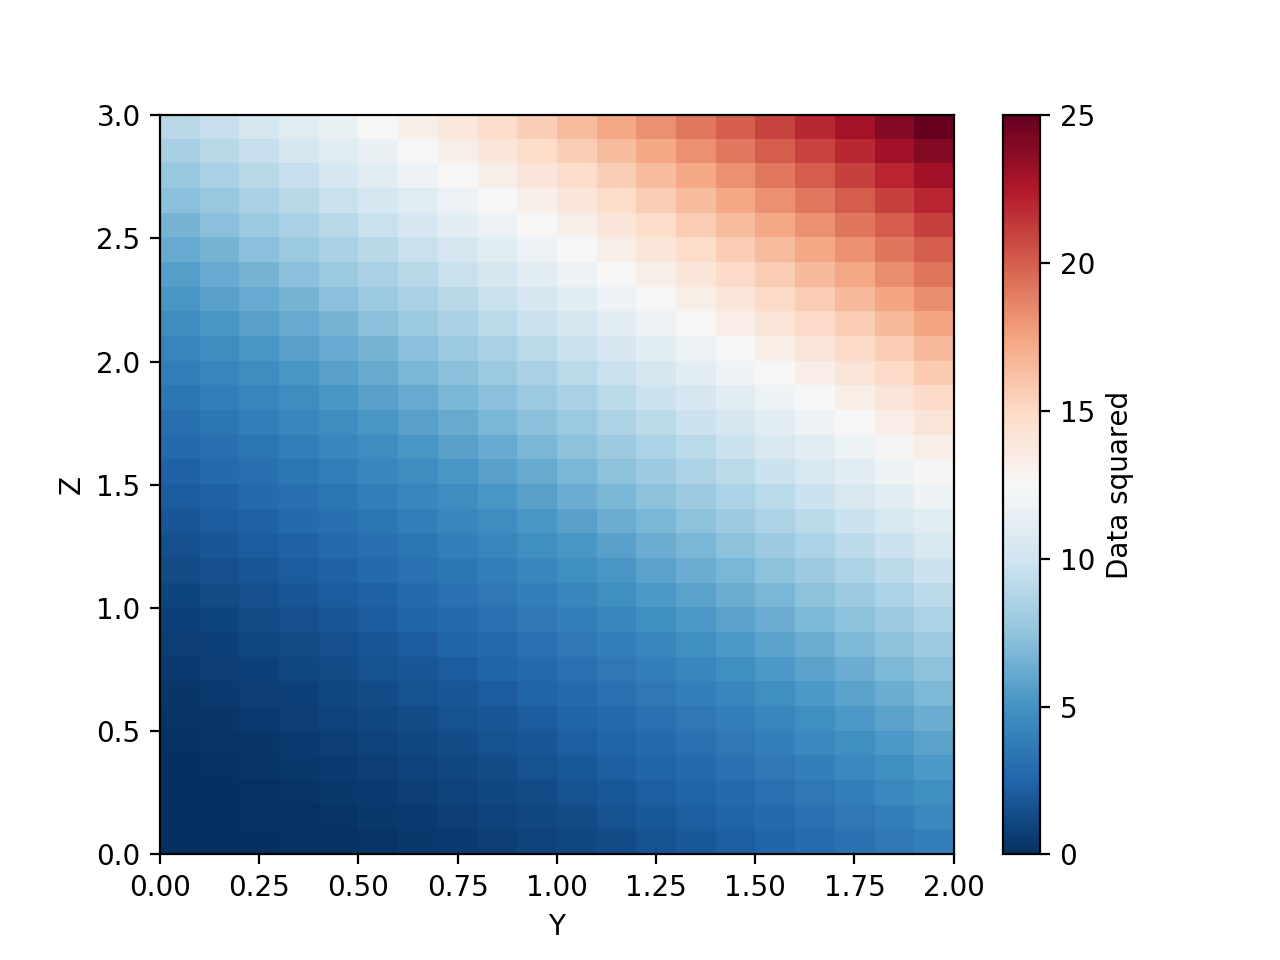

NameError: name 'FloatLogSlider' is not defined

In [18]:
dc.interactive_image()

In [17]:
dc.mtx.sub_lbl()

<IPython.core.display.Javascript object>


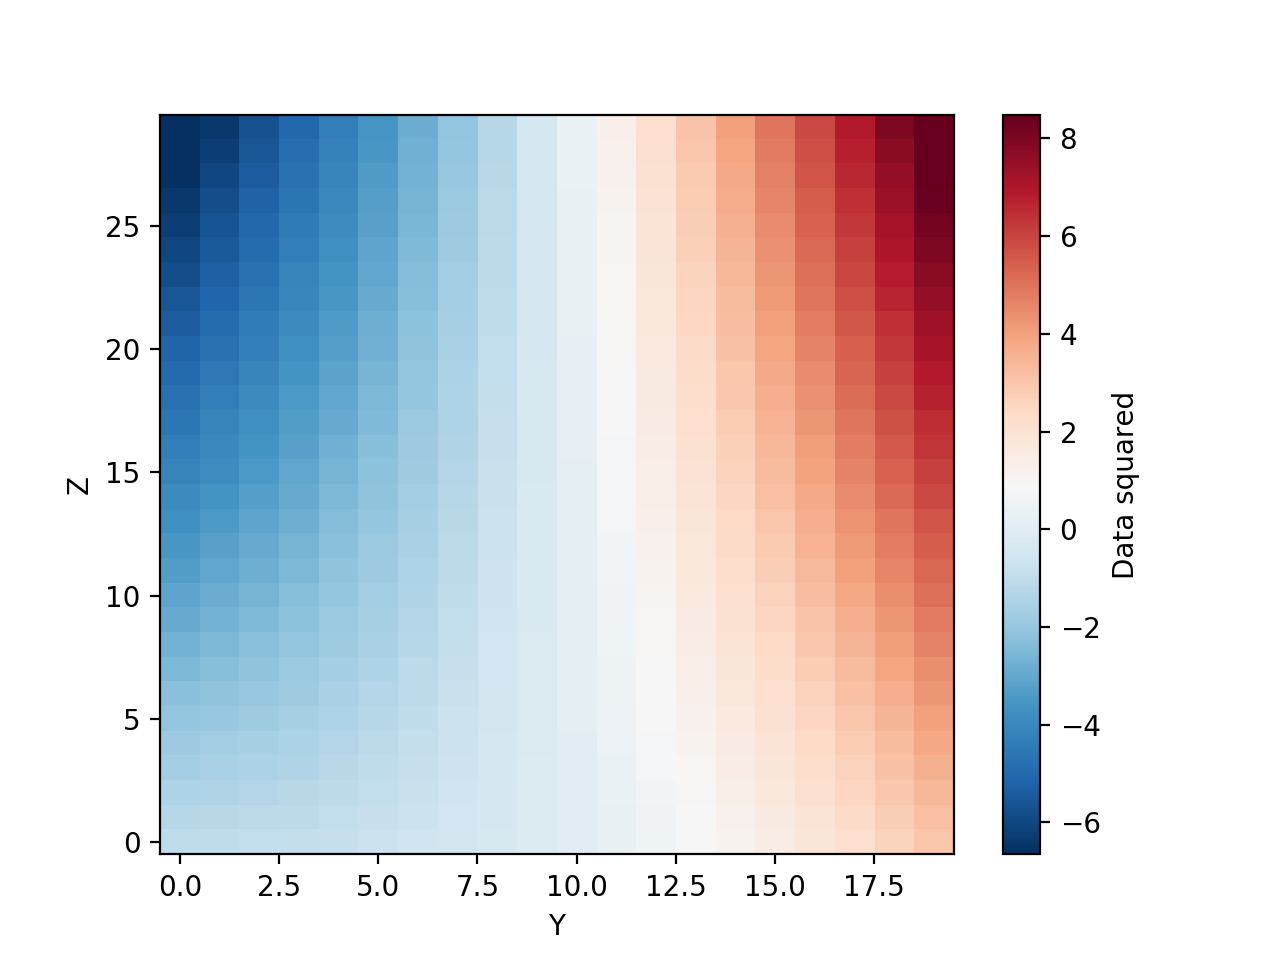

interactive(children=(FloatLogSlider(value=1.0, description='gamma', max=1.0, min=-1.0, readout_format='.2f', …

In [18]:
dc.interactive_image()

<IPython.core.display.Javascript object>


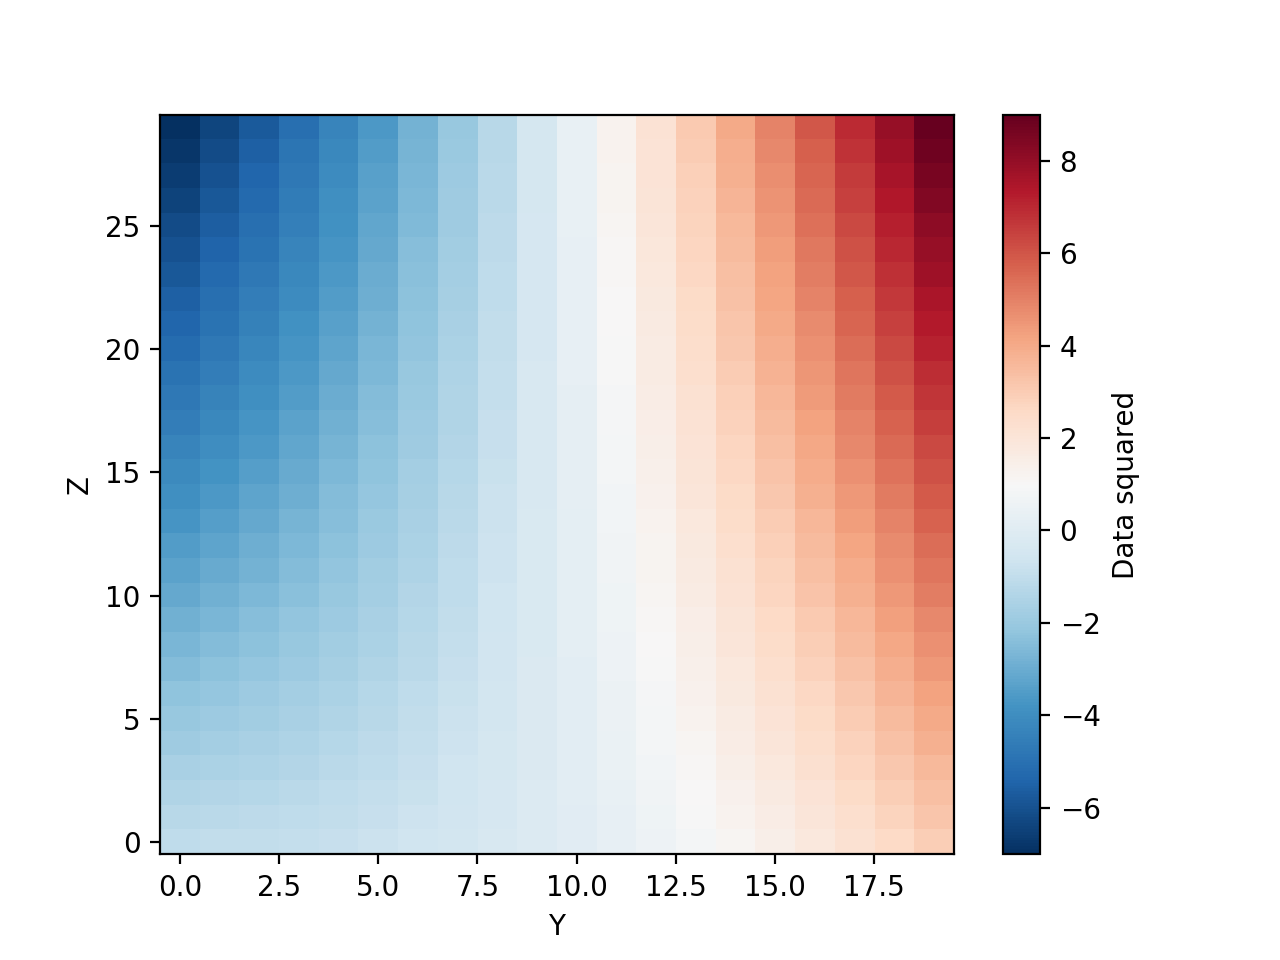

In [19]:
dc.plot_image()

## Test line cuts

<IPython.core.display.Javascript object>


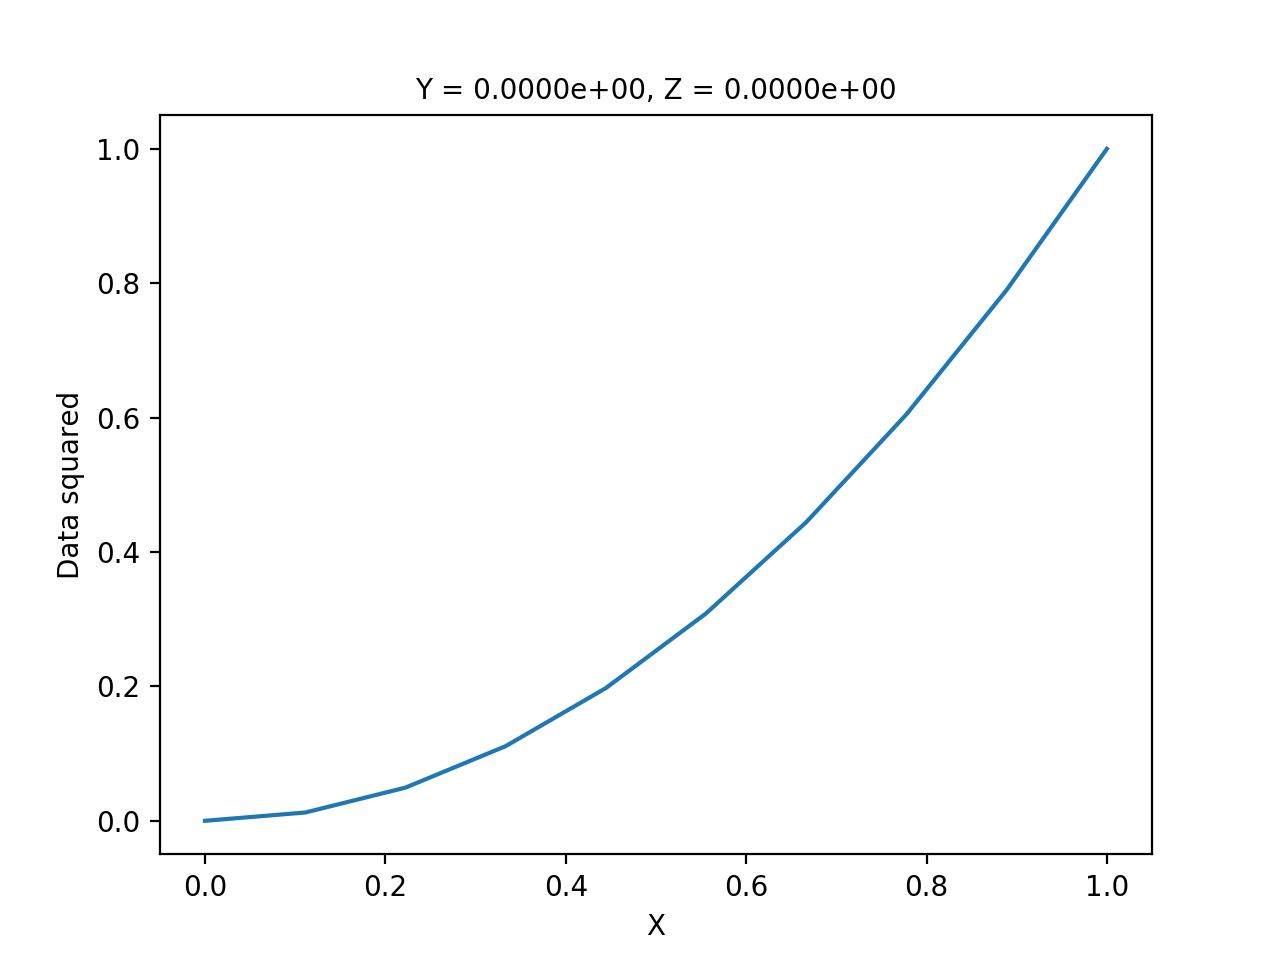

In [20]:
dc.plot_linecut((0,0,0),col=1)

<IPython.core.display.Javascript object>


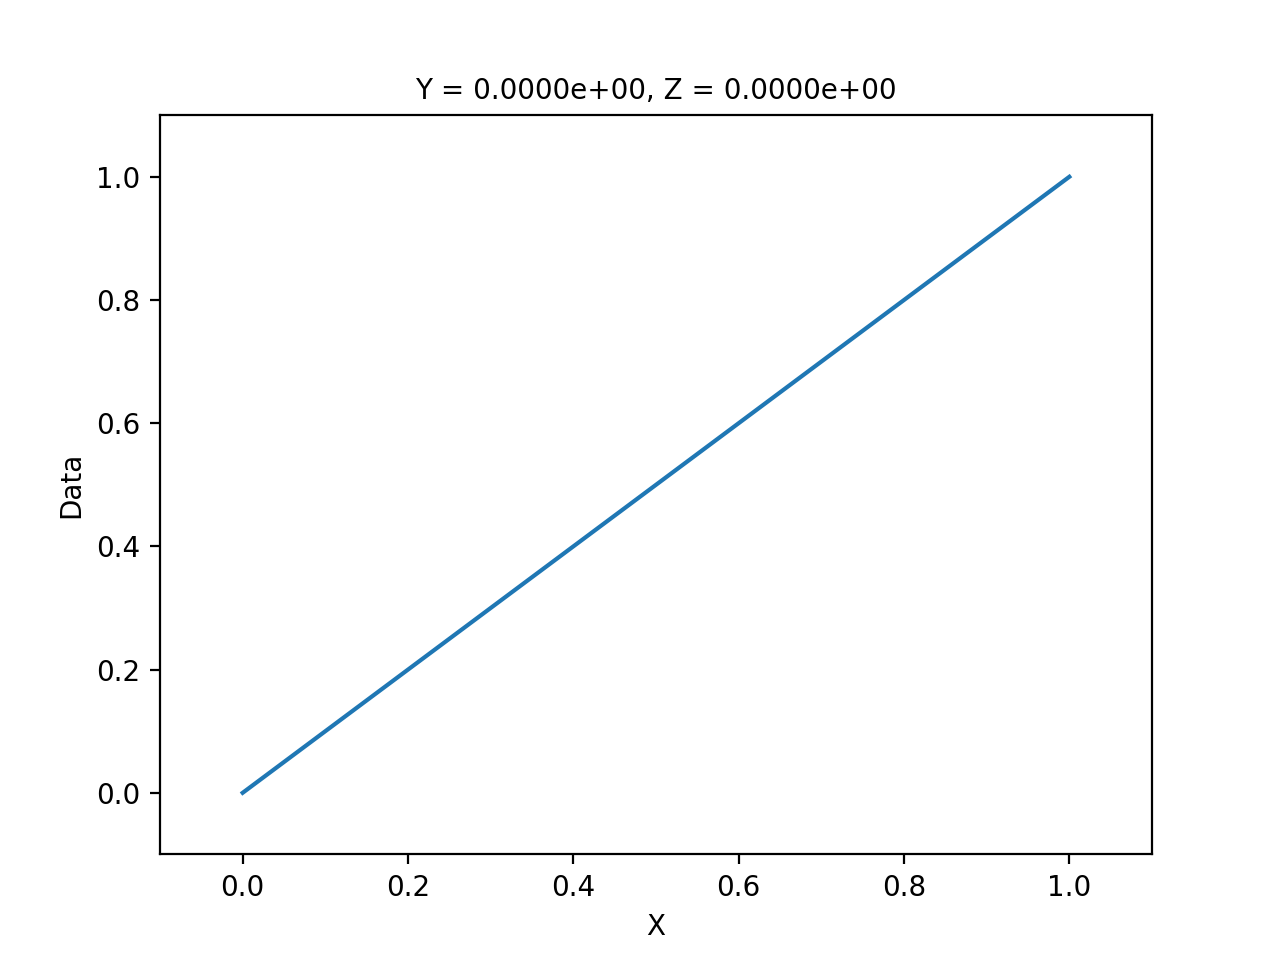

Output()

In [11]:
dc.interactive_linecut()

# Testing with real file

Listing files in a directory:

In [40]:
from glob import glob
folder = "/home/jovyan"
folder += "/steelelab/measurement_data/newBF/Sarwan/20191130_LERA8A9_NC1NC2/"
folder += "LERA8_NC1/OMIT/OT8_2019_12_02_18.42.35_two_tone_spec_bigger_span/"
dat_file = glob(folder+"*.dat")[0]

Finding a file using our NAS file list (updated nightly):

In [6]:
import os 

def find_files(pattern):
    with os.popen("grep %s /home/jovyan/steelelab/file_list " % pattern) as stream:
        file_list = stream.read().splitlines()
    return [s.replace('/volume1/', '/home/jovyan/') for s in file_list]

dat_file = find_files("OT8_2019_12_02_18.42.35.*.dat")[0]

In [44]:
dc = Datacube()
dc.load_dat_meta(dat_file)
dc.default_column = 3

In [45]:
dc.print_info()

Axis 0: Probe Frequency (Hz)
  Start 5.269060e+09
   Stop 5.270060e+09
   Size 10001

Axis 1: Pump Frequency (Hz)
  Start 1.800000e+01
   Stop -3.000000e+01
   Size 25

Axis 2: Nothing
  Start 0.000000e+00
   Stop 1.000000e+00
   Size 1

Columns:
   Col 0: Frequency (Hz)
   Col 1: S21re ()
   Col 2: S21im ()
   Col 3: S21dB (dB)
   Col 4: S21Ph (rad)
   Col 5: Power (dBm)

Current mtx settings:
   Cut axis:  -1
  Cut index:  -1


<IPython.core.display.Javascript object>


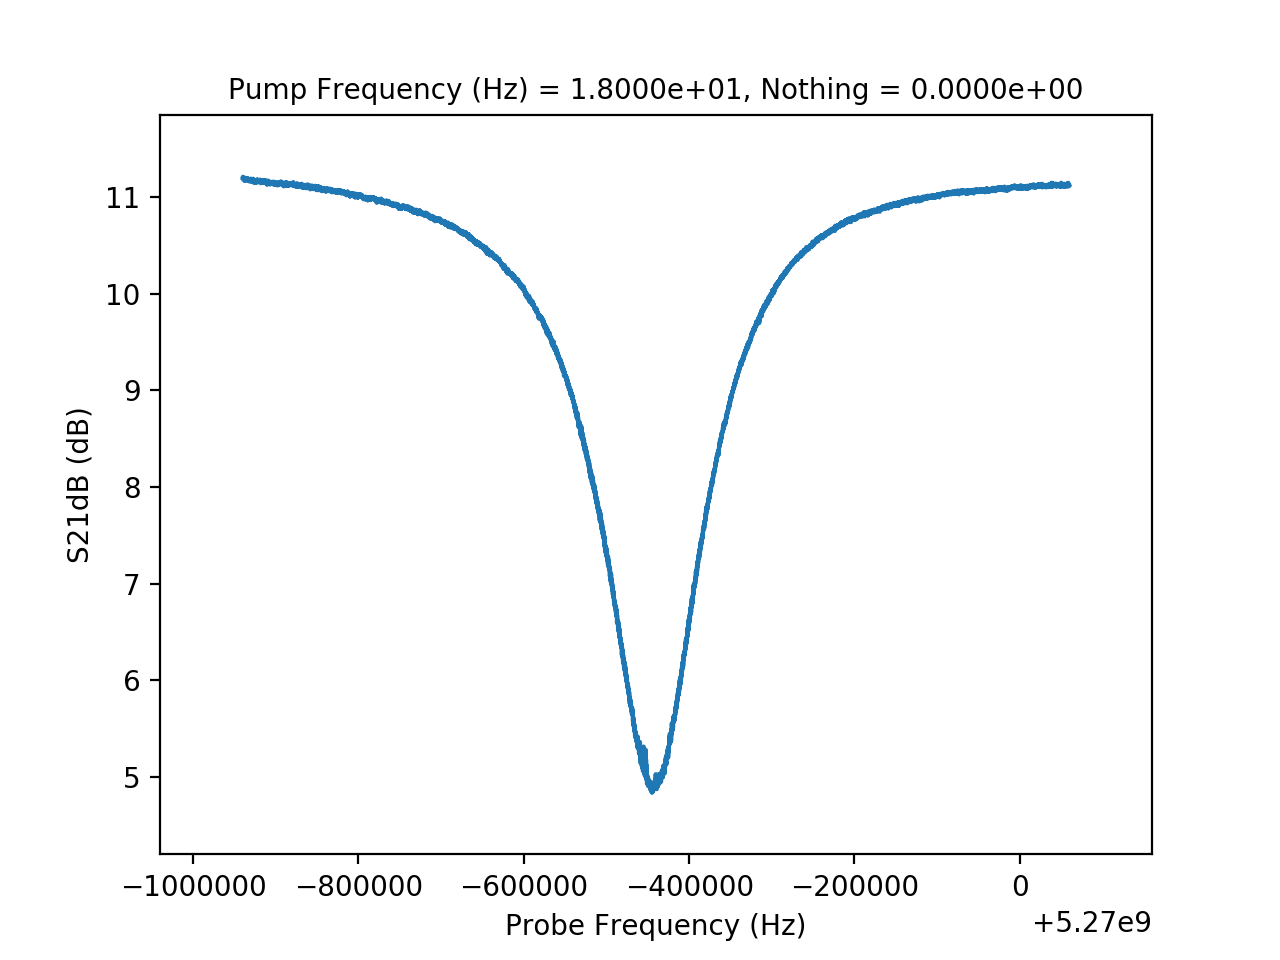

Output()

In [46]:
dc.interactive_linecut()

n1 0
n2 1
(25, 10001)


<IPython.core.display.Javascript object>


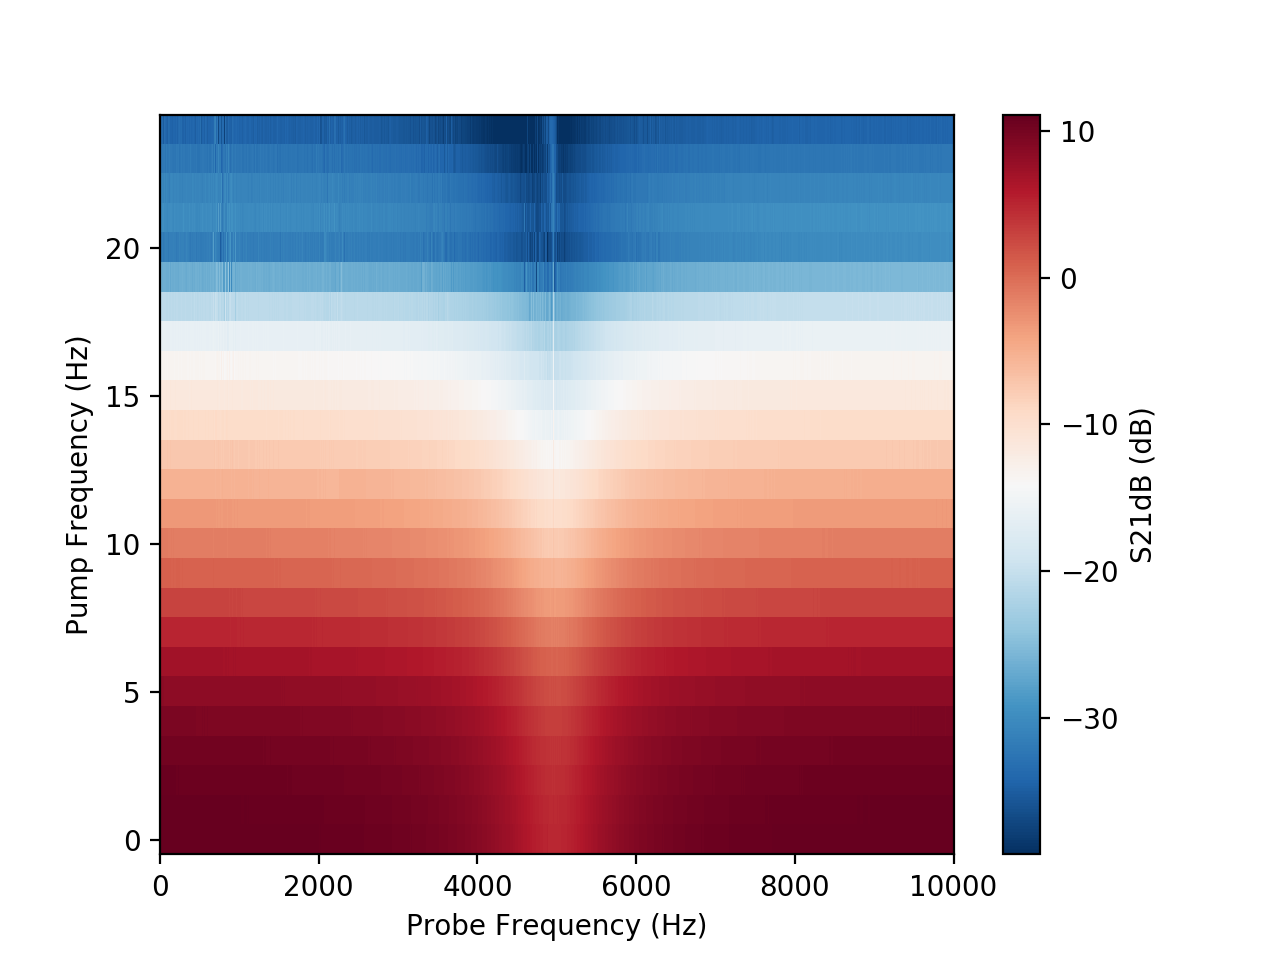

interactive(children=(FloatLogSlider(value=1.0, description='gamma', max=1.0, min=-1.0, readout_format='.2f', …

In [44]:
dc.create_mtx_cut()
dc.interactive_image()

# Testing with array input

In [45]:
d.shape

(10, 20, 30)

In [46]:
d4 = np.zeros([10,20,30,2])
d4.shape

(10, 20, 30, 2)

In [47]:
d4[:,:,:,0] = d
d4[:,:,:,1] = d*d

In [48]:
dc = Datacube()

In [49]:
dc.load_from_array(d4)

In [50]:
dc.print_info()

Axis 0: None
  Start 0.000000e+00
   Stop 1.000000e+00
   Size 10

Axis 1: None
  Start 0.000000e+00
   Stop 1.000000e+00
   Size 20

Axis 2: None
  Start 0.000000e+00
   Stop 1.000000e+00
   Size 30

Columns:
   Col 0: Dim 4 index 0
   Col 1: Dim 4 index 1

Current mtx settings:
   Cut axis:  -1
  Cut index:  -1


I can now manually program the axis ranges, etc:

In [53]:
dc.axis[0].start = 10
dc.axis[0].stop = 20
dc.axis[0].name = "My axis"

In [54]:
dc.print_info()

Axis 0: My axis
  Start 1.000000e+01
   Stop 2.000000e+01
   Size 10

Axis 1: None
  Start 0.000000e+00
   Stop 1.000000e+00
   Size 20

Axis 2: None
  Start 0.000000e+00
   Stop 1.000000e+00
   Size 30

Columns:
   Col 0: Dim 4 index 0
   Col 1: Dim 4 index 1

Current mtx settings:
   Cut axis:  -1
  Cut index:  -1


<IPython.core.display.Javascript object>


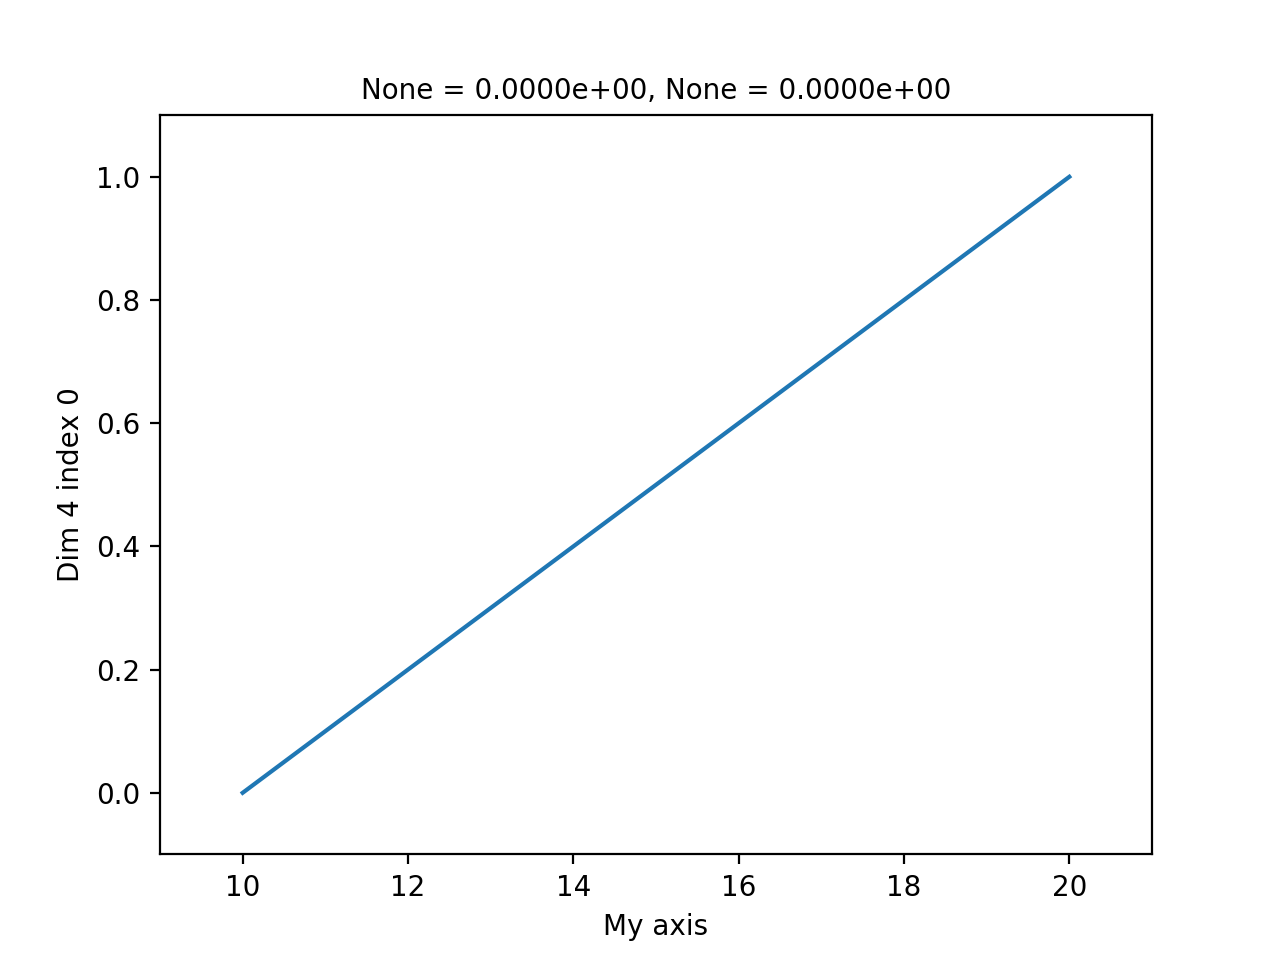

Output()

In [55]:
dc.interactive_linecut()

# Load a .dat file without the meta.txt file

In [12]:
from datacube import Datacube
import os

def find_files(pattern):
    with os.popen("grep %s /home/jovyan/steelelab/file_list " % pattern) as stream:
        file_list = stream.read().splitlines()
    return [s.replace('/volume1/', '/home/jovyan/') for s in file_list]
dat_file = find_files("OT8_2019_12_02_18.42.35.*.dat")[0]

dc = Datacube()
dc.load_dat_without_meta(dat_file)

['Frequency (Hz)', 'S21re ()', 'S21im ()', 'S21dB (dB)', 'S21Ph (rad)', 'Power (dBm)']


(25, 10001)


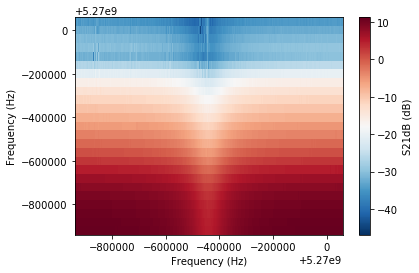

In [6]:
dc.default_column = 3
dc.create_mtx_cut()
fig,ax = dc.plot_image()